✅ Libraries imported
✅ Dataset loaded: 11598 rows, 471 columns
✅ Features: 470 numeric columns
✅ Label column: 'Class'
✅ Training samples: 8118, Test samples: 3480

🎯 MODEL PERFORMANCE
Accuracy:  0.9408
Precision: 0.9416
Recall:    0.9408
F1-score:  0.9408

⏳ Generating SHAP explanation (takes 10-20 seconds)...


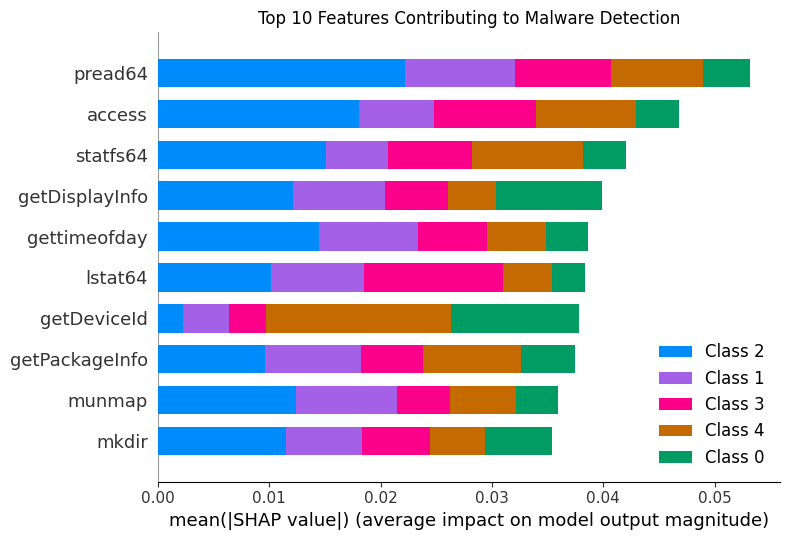


🎉 DONE! Your hybrid malware detector with XAI is ready.


In [ ]:
# ============================================
# COMPLETE ANDROID MALWARE DETECTOR (HYBRID + XAI)
# ============================================

# 1. Install SHAP (only once)
!pip install shap -q

# 2. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import shap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported")

# ============================================
# LOAD YOUR CSV – PASTE THE FILE PATH BELOW
# ============================================

# 🔴 REPLACE THIS PATH with the one you copied (right-click → copy path)
file_path = '/content/feature_vectors_syscallsbinders_frequency_5_Cat.csv'   # <-- CHANGE THIS

# Load the dataset
df = pd.read_csv(file_path)
print(f"✅ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Show first 3 rows to understand the columns
df.head(3)

# ============================================
# FIND THE LABEL COLUMN (benign / malware)
# ============================================

possible_labels = ['Label', 'Class', 'category', 'type', 'benign', 'malware', 'is_malware']
label_col = None

for col in possible_labels:
    if col in df.columns:
        label_col = col
        break

# If not found, ask user to pick manually
if label_col is None:
    print("⚠️ Could not detect label column automatically.")
    print("Available columns:", list(df.columns))
    label_col = input("Type the exact name of the column that contains 0/1 or benign/malware: ")

# Separate features (X) and label (y)
X = df.drop(columns=[label_col], errors='ignore')
y = df[label_col]

# Keep only numeric columns (drop text columns)
X = X.select_dtypes(include=[np.number])

# Fill missing values with 0
X = X.fillna(0)

print(f"✅ Features: {X.shape[1]} numeric columns")
print(f"✅ Label column: '{label_col}'")

# ============================================
# TRAIN TEST SPLIT
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"✅ Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# ============================================
# TRAIN RANDOM FOREST (HYBRID MODEL)
# ============================================
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# ============================================
# EVALUATION METRICS
# ============================================
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n" + "="*40)
print("🎯 MODEL PERFORMANCE")
print("="*40)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print("="*40)

# ============================================
# EXPLAINABLE AI – SHAP (Top 10 features)
# ============================================
print("\n⏳ Generating SHAP explanation (takes 10-20 seconds)...")

# Take a small sample to make SHAP fast
X_sample = X_test.sample(50, random_state=42)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)

# If binary classification, shap_values is a list; take the positive class
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Plot feature importance bar chart
shap.summary_plot(shap_values, X_sample, plot_type="bar", max_display=10, show=False)
plt.title("Top 10 Features Contributing to Malware Detection")
plt.tight_layout()
plt.show()

print("\n🎉 DONE! Your hybrid malware detector with XAI is ready.")

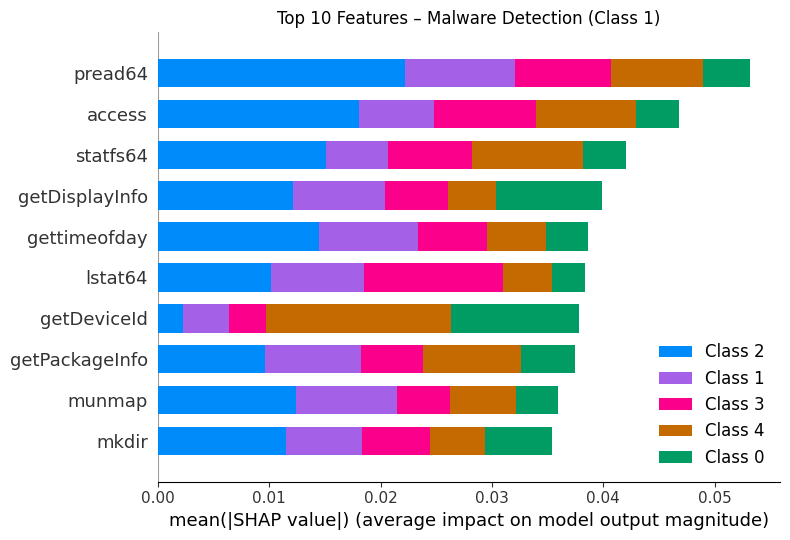

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Take a small sample
X_sample = X_test.sample(50, random_state=42)

# Create explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)

# Handle multiclass: shap_values is a list of arrays (one per class)
if isinstance(shap_values, list):
    # For multiclass, pick the class with highest average impact (usually malware)
    # Here we simply pick class 1 (first malware class) – change index if needed
    shap_values_class = shap_values[1]
else:
    shap_values_class = shap_values

# Plot
shap.summary_plot(shap_values_class, X_sample, plot_type="bar", max_display=10, show=False)
plt.title("Top 10 Features – Malware Detection (Class 1)")
plt.tight_layout()
plt.show()